In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import re
import matplotlib.ticker as mtick

sns.set()
sns.set_style("whitegrid")

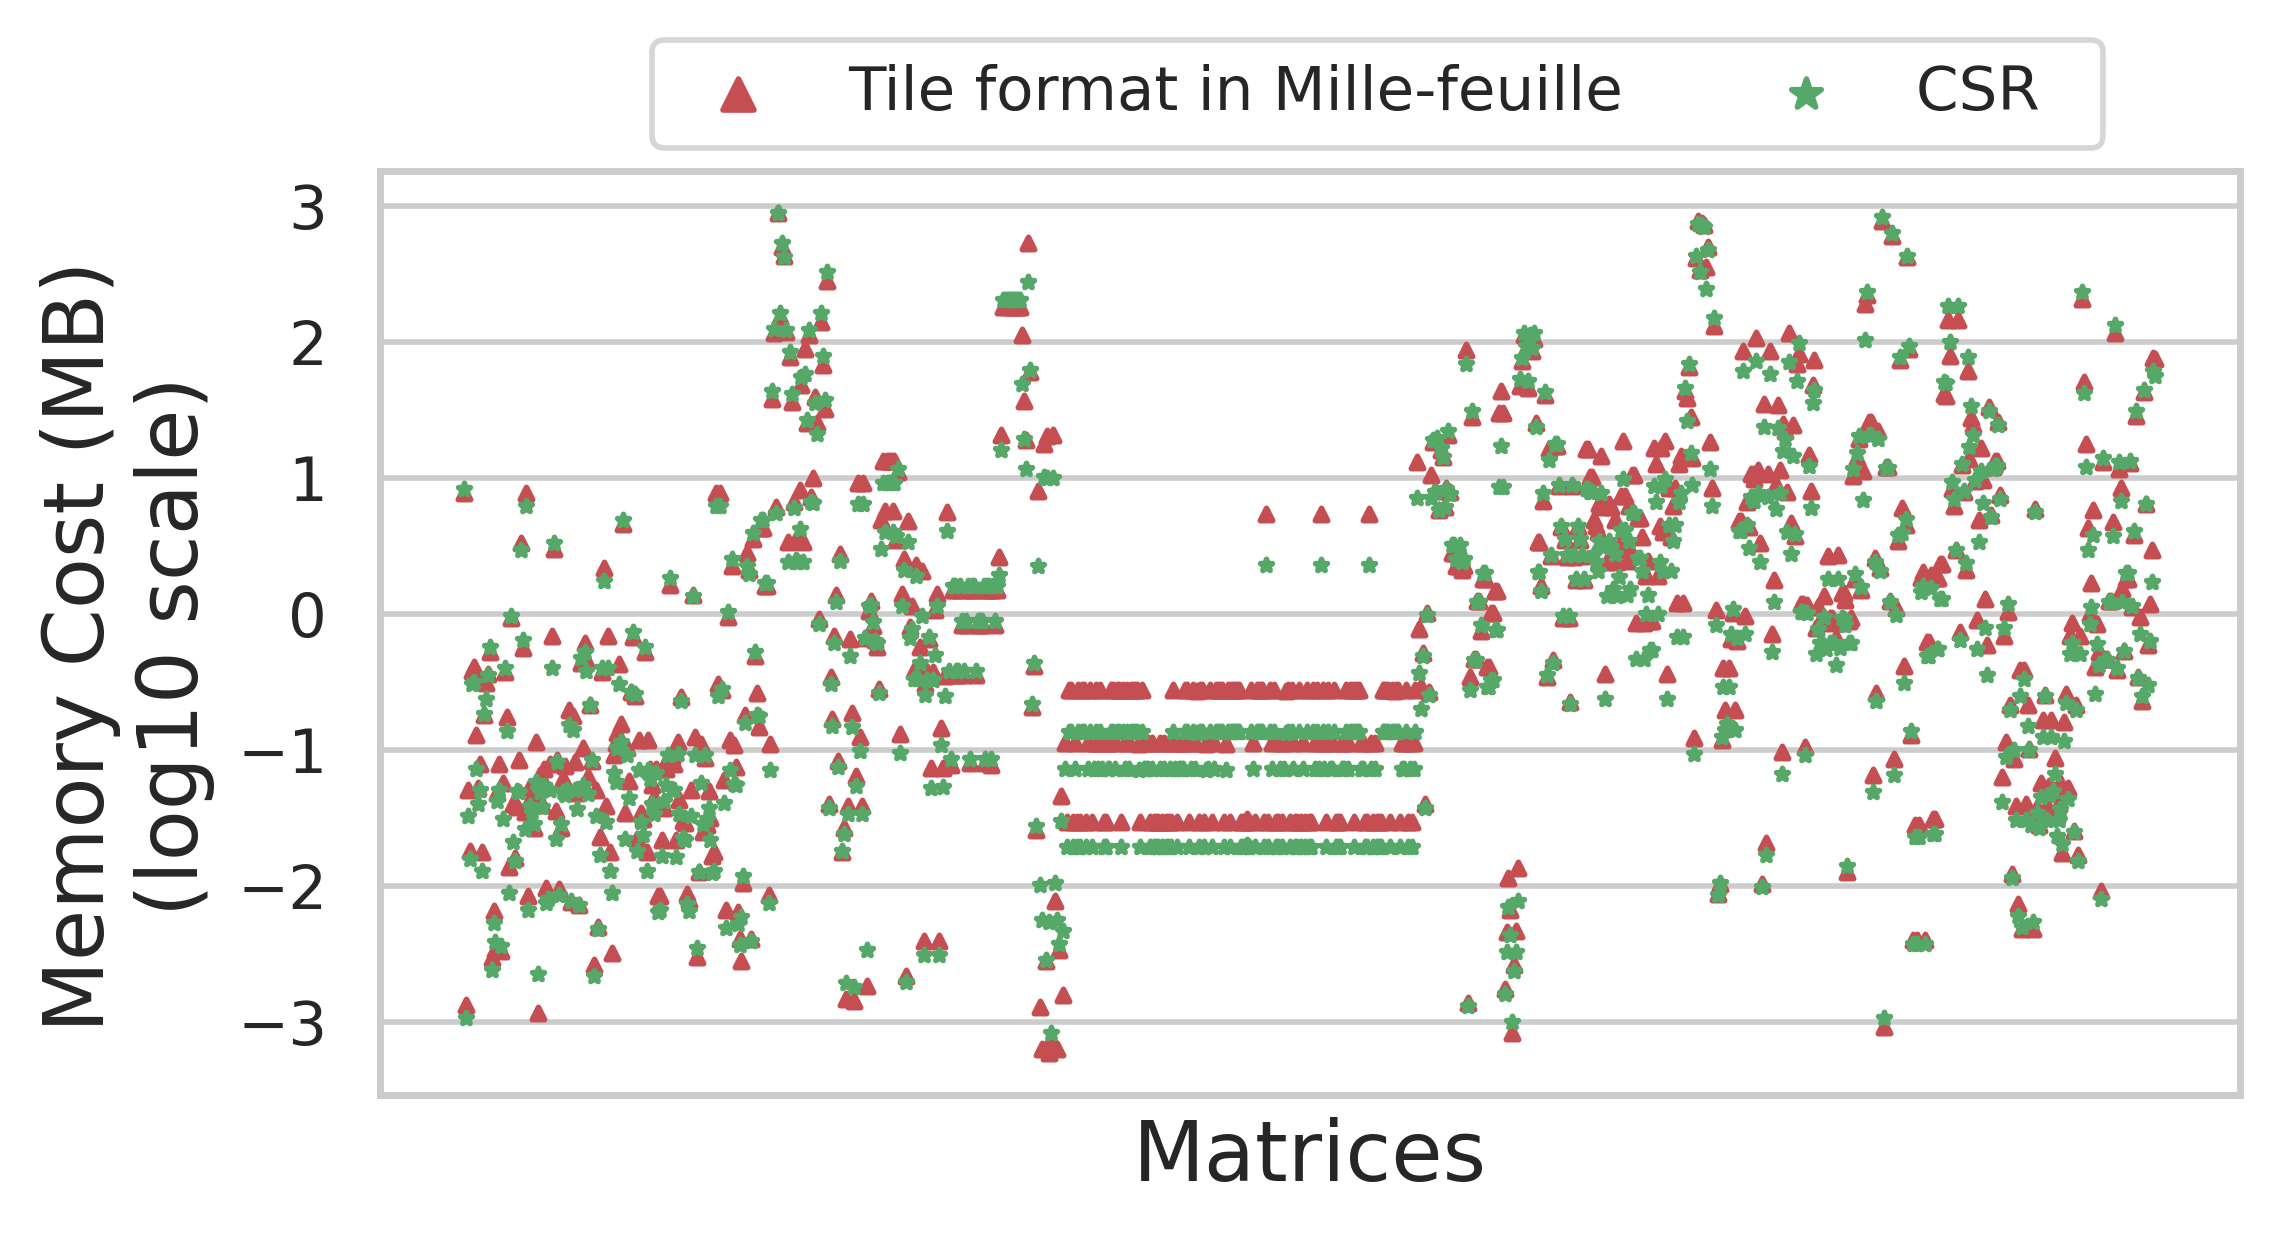

In [2]:
size=5
plt.figure(figsize=(6,3),dpi=400)
memory_bykrylov = pd.read_csv(
    "./data/memory_mille_feillue.csv",
    header=None,
    names=["mat","memory_by","memory_CP","nnzR"])
memory_bykrylov["memory_by"]=memory_bykrylov["memory_by"]+memory_bykrylov["memory_CP"]
memory_MpSpMV = pd.read_csv(
    "./data/memory_nnz.csv",
    header=None,
    names=["mat","memory_mp","nnzR_MP"])
memory_cuSPARSE = pd.read_csv(
    "./data/memory_cuSPARSE_nnz.csv",
    header=None,
    names=["mat","memory_cu","nnzR_CU"])
df_memory=pd.merge(memory_MpSpMV, memory_cuSPARSE, on="mat", how="inner")
df_memory=pd.merge(df_memory, memory_bykrylov, on="mat", how="inner")
cnt=0
memory_by=[]
memory_cu=[]
memory_mp=[]
nnzR=[]
sp_cu=0
sp_cu_new=0
sp_me=0
sp_mp=0
cnt_new=0
for i in range(0,len(df_memory["memory_cu"])):
        memory_by.append(df_memory["memory_by"][i])
        memory_cu.append(df_memory["memory_cu"][i])
        memory_mp.append(df_memory["memory_mp"][i])
        nnzR.append(df_memory["nnzR"][i])
        sp_cu=sp_cu+(df_memory["memory_by"][i]-df_memory["memory_cu"][i])
        sp_cu_new=sp_cu_new+df_memory["memory_cu"][i]
        sp_me=sp_me+df_memory["memory_by"][i]
        sp_mp=sp_mp+(df_memory["memory_by"][i]-df_memory["memory_mp"][i])
        cnt_new+=1
for i in range(0,len(df_memory["memory_cu"])):
    if df_memory["memory_by"][i]>10.0 and df_memory["memory_cu"][i]>10.0 and df_memory["memory_mp"][i]>10.0:
        if df_memory["memory_by"][i]>df_memory["memory_cu"][i]:
            cnt=cnt+1
x=np.arange(len(memory_by))
plt.scatter(x, np.log10(memory_by), label="Tile format in Mille-feuille", s=size, c="r",marker='^')
plt.scatter(x, np.log10(memory_cu), label="CSR  ", s=size, c="g",marker='*')
plt.ylabel("Memory Cost (MB) \n(log10 scale) ",size=15)
plt.xlabel("Matrices",labelpad=4,size=15)
plt.xticks([])
plt.legend(ncol=2, bbox_to_anchor=(0.13, 1.175), loc='upper left',markerscale=2.5,fontsize=11)
plt.savefig("Figure 12.pdf", dpi= 400, format = "pdf", bbox_inches='tight', pad_inches=0.0)